In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/ushape.csv")
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       99 non-null     float64
 1   Y       99 non-null     float64
 2   class   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


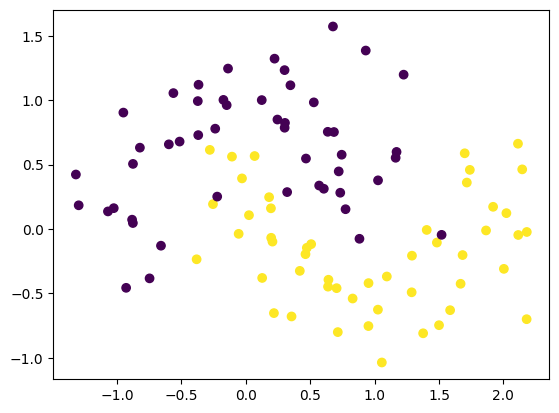

In [3]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [4]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
y[0:5]

array([1., 0., 1., 1., 1.])

In [12]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

In [13]:
y_cat[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
from sklearn.model_selection import train_test_split
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

### GlorotNormal initializer

In [17]:
from tensorflow.keras.initializers import GlorotNormal

In [29]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=10, activation='tanh', kernel_initializer=GlorotNormal(), input_shape=(2,)))
model.add(Dense(units=10, activation='tanh', kernel_initializer=GlorotNormal()))
model.add(Dense(units=2, activation='softmax', kernel_initializer=GlorotNormal()))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 129ms/step - loss: 0.5330 - accuracy: 0.7595 - val_loss: 0.4439 - val_accuracy: 0.9000
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.5184 - accuracy: 0.7722 - val_loss: 0.4297 - val_accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5043 - accuracy: 0.7848 - val_loss: 0.4169 - val_accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.4929 - accuracy: 0.8101 - val_loss: 0.4046 - val_accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 18ms/step - loss: 0.4816 - accuracy: 0.8101 - val_loss: 0.3930 - val_accuracy: 0.9500
Epoch 6/50
3/3 [==============================] - 0s 18ms/step - loss: 0.4704 - accuracy: 0.8101 - val_loss: 0.3808 - val_accuracy: 0.9500
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4630 - accuracy: 0.8101 - val_loss: 0.3697 - val_accuracy: 0.9500
Epoch 8/50
3/3 [==========

In [19]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 28ms/step - loss: 0.3778 - accuracy: 0.9500
Test Accuracy: 0.95


313/313 [==============================] - 1s 2ms/step


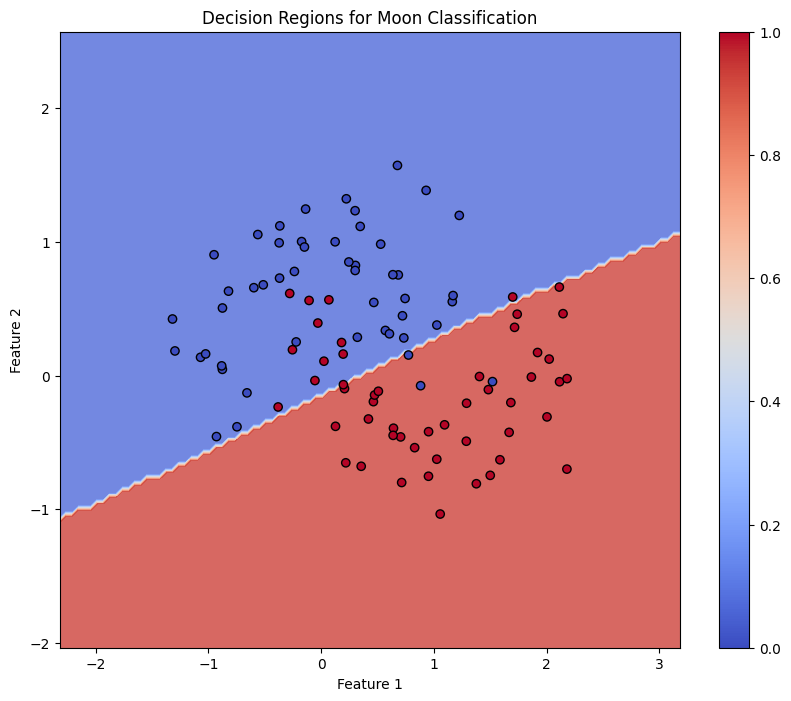

In [30]:
# Convert one-hot encoded y_cat to 1-dimensional array of class labels
y = np.argmax(y_cat, axis=1)


# Create mesh grid for plotting decision regions
# Adjust the ranges based on your input data X
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class probabilities for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert predictions to class labels
Z = np.argmax(Z, axis=1)

# Reshape predictions to match mesh grid dimensions
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Add plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Moon Classification')

# Add color bar
plt.colorbar()

# Show plot
plt.show()


### GlorotUniform initializer

In [32]:
from tensorflow.keras.initializers import GlorotUniform

In [33]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=10, activation='tanh', kernel_initializer=GlorotUniform(), input_shape=(2,)))
model.add(Dense(units=10, activation='tanh', kernel_initializer=GlorotUniform()))
model.add(Dense(units=2, activation='softmax', kernel_initializer=GlorotUniform()))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 2s 420ms/step - loss: 0.4497 - accuracy: 0.7722 - val_loss: 0.2809 - val_accuracy: 0.9000
Epoch 2/50
3/3 [==============================] - 0s 38ms/step - loss: 0.4421 - accuracy: 0.7722 - val_loss: 0.2746 - val_accuracy: 0.9000
Epoch 3/50
3/3 [==============================] - 0s 38ms/step - loss: 0.4338 - accuracy: 0.7975 - val_loss: 0.2693 - val_accuracy: 0.9000
Epoch 4/50
3/3 [==============================] - 0s 36ms/step - loss: 0.4285 - accuracy: 0.7975 - val_loss: 0.2654 - val_accuracy: 0.9000
Epoch 5/50
3/3 [==============================] - 0s 36ms/step - loss: 0.4228 - accuracy: 0.8101 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 6/50
3/3 [==============================] - 0s 45ms/step - loss: 0.4172 - accuracy: 0.8101 - val_loss: 0.2584 - val_accuracy: 0.9000
Epoch 7/50
3/3 [==============================] - 0s 27ms/step - loss: 0.4138 - accuracy: 0.8228 - val_loss: 0.2563 - val_accuracy: 0.9000
Epoch 8/50
3/3 [==========

In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 30ms/step - loss: 0.2197 - accuracy: 0.9500
Test Accuracy: 0.95


313/313 [==============================] - 1s 3ms/step


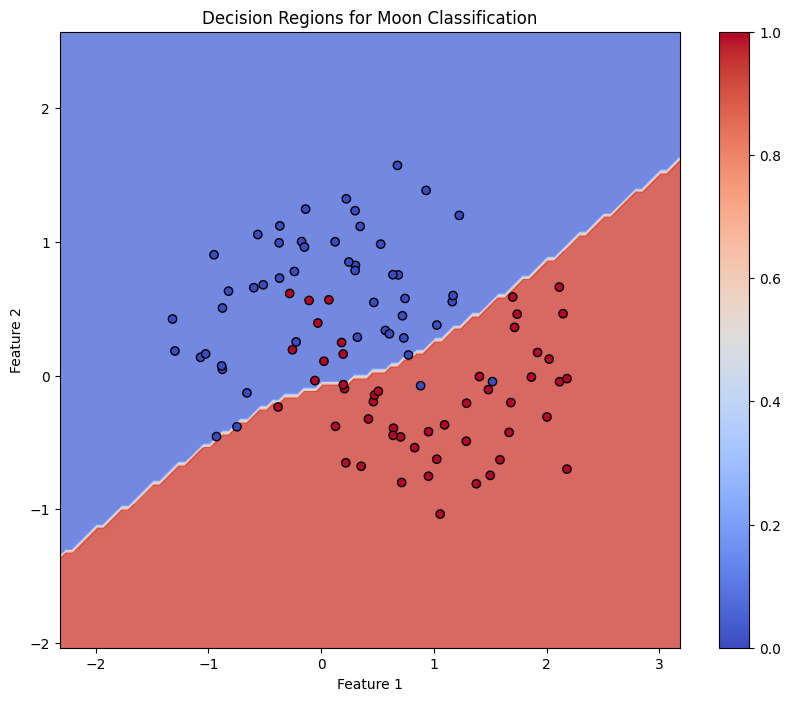

In [36]:
# Convert one-hot encoded y_cat to 1-dimensional array of class labels
y = np.argmax(y_cat, axis=1)


# Create mesh grid for plotting decision regions
# Adjust the ranges based on your input data X
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class probabilities for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert predictions to class labels
Z = np.argmax(Z, axis=1)

# Reshape predictions to match mesh grid dimensions
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Add plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Moon Classification')

# Add color bar
plt.colorbar()

# Show plot
plt.show()


### HeNormal initializer

In [47]:
from tensorflow.keras.initializers import HeNormal

In [48]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=10, activation='relu', kernel_initializer=HeNormal(), input_shape=(2,)))
model.add(Dense(units=10, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(units=2, activation='softmax', kernel_initializer=HeNormal()))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 186ms/step - loss: 0.6347 - accuracy: 0.7468 - val_loss: 0.9149 - val_accuracy: 0.5500
Epoch 2/50
3/3 [==============================] - 0s 34ms/step - loss: 0.6140 - accuracy: 0.7595 - val_loss: 0.8739 - val_accuracy: 0.5500
Epoch 3/50
3/3 [==============================] - 0s 25ms/step - loss: 0.5969 - accuracy: 0.7595 - val_loss: 0.8353 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.5822 - accuracy: 0.7975 - val_loss: 0.8009 - val_accuracy: 0.6500
Epoch 5/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5685 - accuracy: 0.7722 - val_loss: 0.7710 - val_accuracy: 0.7000
Epoch 6/50
3/3 [==============================] - 0s 27ms/step - loss: 0.5566 - accuracy: 0.7722 - val_loss: 0.7446 - val_accuracy: 0.7000
Epoch 7/50
3/3 [==============================] - 0s 26ms/step - loss: 0.5470 - accuracy: 0.7722 - val_loss: 0.7203 - val_accuracy: 0.7000
Epoch 8/50
3/3 [==========

In [50]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 27ms/step - loss: 0.3687 - accuracy: 0.8000
Test Accuracy: 0.80


313/313 [==============================] - 0s 1ms/step


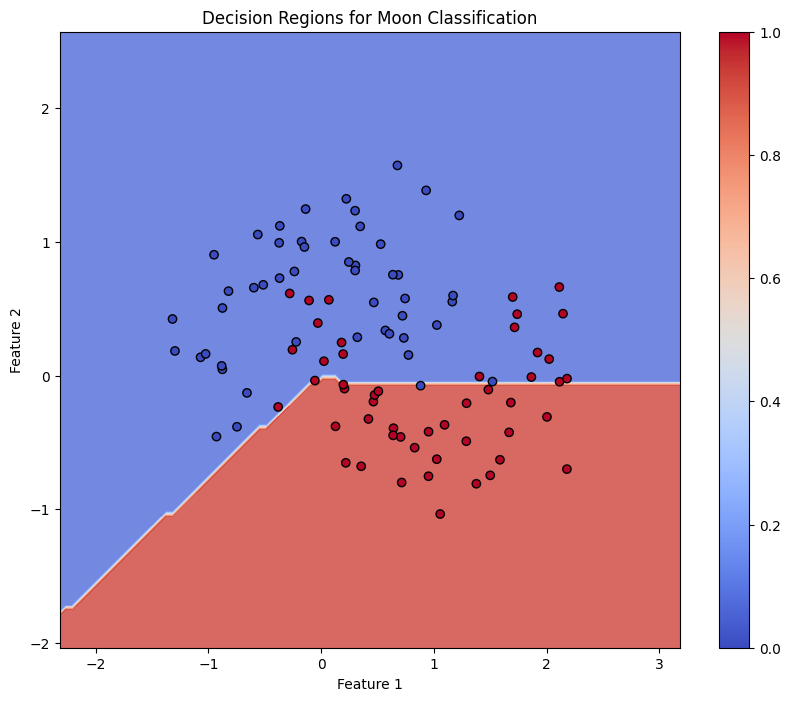

In [51]:
# Convert one-hot encoded y_cat to 1-dimensional array of class labels
y = np.argmax(y_cat, axis=1)


# Create mesh grid for plotting decision regions
# Adjust the ranges based on your input data X
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class probabilities for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert predictions to class labels
Z = np.argmax(Z, axis=1)

# Reshape predictions to match mesh grid dimensions
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Add plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Moon Classification')

# Add color bar
plt.colorbar()

# Show plot
plt.show()

### HeUniform initializer

In [42]:
from tensorflow.keras.initializers import HeUniform

In [43]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=10, activation='relu', kernel_initializer=HeUniform(), input_shape=(2,)))
model.add(Dense(units=10, activation='relu', kernel_initializer=HeUniform()))
model.add(Dense(units=2, activation='softmax', kernel_initializer=HeUniform()))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 166ms/step - loss: 0.5387 - accuracy: 0.6962 - val_loss: 0.4697 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.5244 - accuracy: 0.7089 - val_loss: 0.4523 - val_accuracy: 0.7500
Epoch 3/50
3/3 [==============================] - 0s 24ms/step - loss: 0.5122 - accuracy: 0.7089 - val_loss: 0.4365 - val_accuracy: 0.7500
Epoch 4/50
3/3 [==============================] - 0s 27ms/step - loss: 0.5006 - accuracy: 0.7215 - val_loss: 0.4218 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 0s 33ms/step - loss: 0.4897 - accuracy: 0.7215 - val_loss: 0.4070 - val_accuracy: 0.8000
Epoch 6/50
3/3 [==============================] - 0s 33ms/step - loss: 0.4796 - accuracy: 0.7342 - val_loss: 0.3940 - val_accuracy: 0.8000
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 0.4707 - accuracy: 0.7595 - val_loss: 0.3814 - val_accuracy: 0.8000
Epoch 8/50
3/3 [==========

In [45]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1/1 [==============================] - 0s 31ms/step - loss: 0.2049 - accuracy: 0.9500
Test Accuracy: 0.95


313/313 [==============================] - 1s 2ms/step


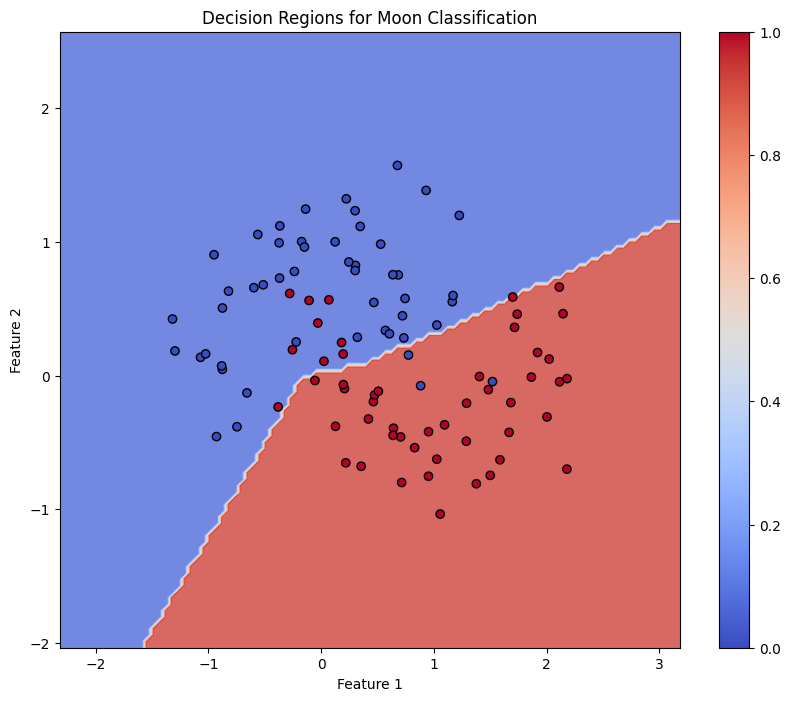

In [46]:
# Convert one-hot encoded y_cat to 1-dimensional array of class labels
y = np.argmax(y_cat, axis=1)


# Create mesh grid for plotting decision regions
# Adjust the ranges based on your input data X
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class probabilities for each point in mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert predictions to class labels
Z = np.argmax(Z, axis=1)

# Reshape predictions to match mesh grid dimensions
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Add plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Regions for Moon Classification')

# Add color bar
plt.colorbar()

# Show plot
plt.show()